# ROS

### Navigation
Robot navigation is about making a robot move autonomously in an environment.

There are many techniques to make robots navigate. The most common is based on SLAM.

In order to make a robot move around using SLAM you need to deal with four things:

1.How to create a map of the environment: this helps the robot understand how is the environment where it will work.

2.How to localize the robot on that map: this means, the robot has to identify where it is in the environment and to which point in the map it corresponds.

3.How to compute a path from a point to another of the map.

4.How to move the robot following the path.

5.How to make the robot avoid obstables in the path.

You also need in the robot:

1.A laser

2.An odometry system

### ROS Navigation stack
The goal of the navigation stack is to move a robot from one position to another position safely (without crashing or getting lost).
It takes in information from the odometry, sensors, and a goal pose and outputs safe velocity commands that are sent to the robot.

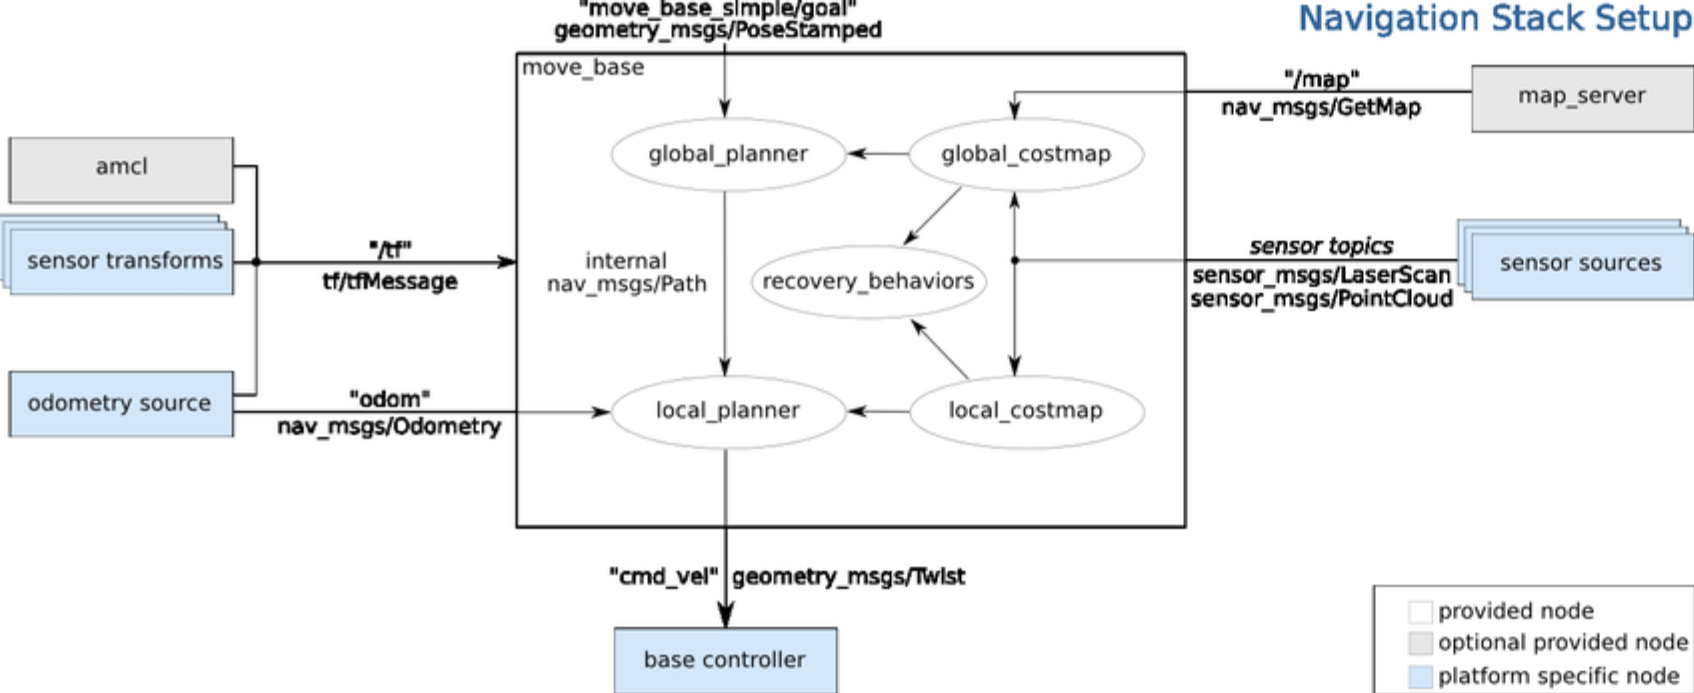

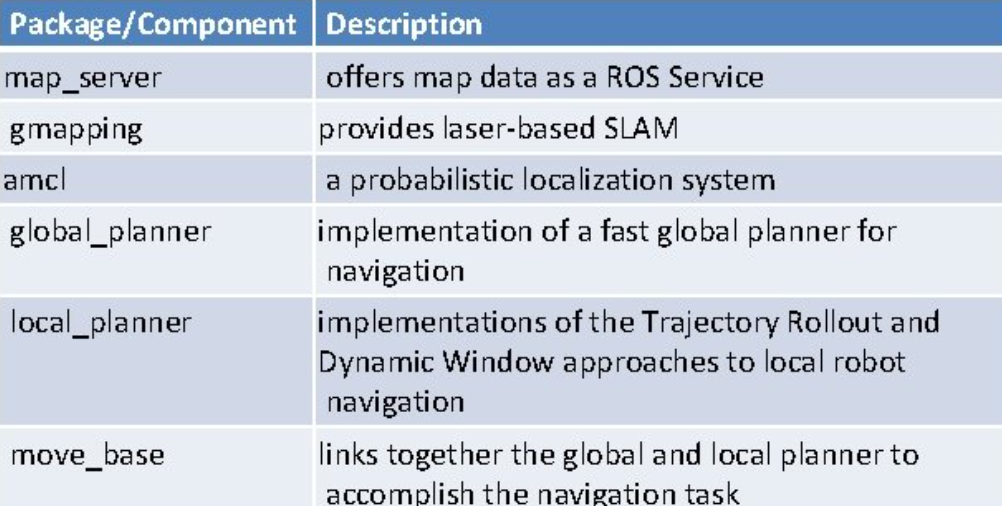

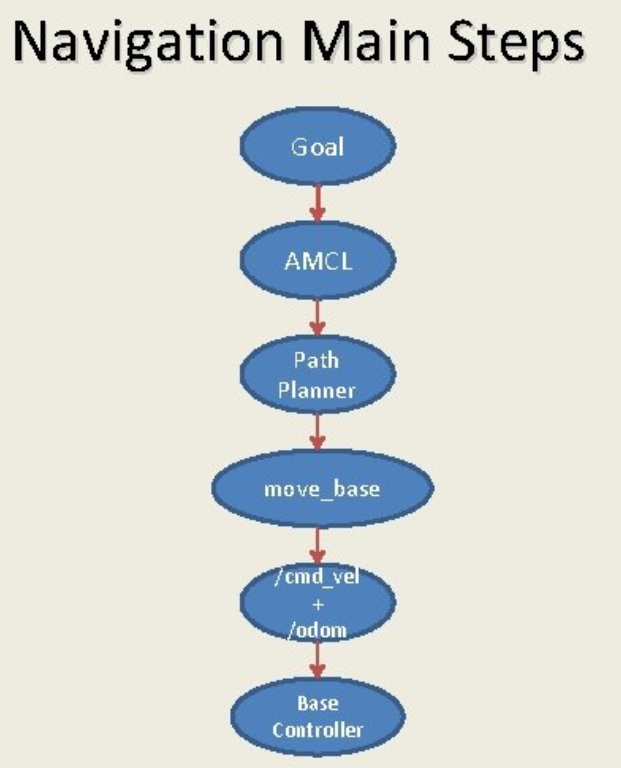

Navigation stack: https://slidetodoc.com/october-2016-ros-lecture-7-ros-navigation-stack/

### To map the environment, there are many ROS packages which can be used:

### Gmapping
Gmapping requires odometry data from the mobile robot. So, if one has odometry data coming from the robot, Gmapping can be used.


### Hector Mapping
The advantage of using Hector Mapping is that it does not need Odometry data and it just requires the LaserScan data. Its disadvantage is that it does not provide loop closing ability but it is still good for real-world scenarios specially when you do not have odometry data.

Even if one has odometry data, Hector Mapping is preferred over Gmapping. Hector Mapping also gives good pose estimates of the robot.

Using Hector Mapping, one can create a very good map of the environment. The other option is to generate a map in softwares like Photoshop. However, one should make sure to have a proper resolution while making a map in Photoshop.

### How to create a map
The gmapping ROS package is an implementation of a specific SLAM mapping algorithm called gmapping. This means that, somebody has implemented the gmapping algorithm for you to use inside ROS, without having to code it yourself. So if you use the ROS Navigation stack, you only need to know (and have to worry about) how to configure gmapping for your specific robot (which is precisely what you'll learn in this Chapter).

The gmapping package contains a ROS Node called slam_gmapping, which allows you to create a 2D map using the laser and pose data that your mobile robot is providing while moving around an environment. This node basically reads data from the laser and the transforms of the robot, and turns it into an occupancy grid map (OGM).

### Gmapping algorithm 
The gmapping package provides laser-based SLAM (Simultaneous Localization and Mapping), as a ROS node called slam_gmapping. Using slam_gmapping, you can create a 2-D occupancy grid map (like a building floorplan) from laser and pose data collected by a mobile robot.

Slam algorithm: https://www.mathworks.com/discovery/slam.html

### Create a workspace and a new package named my_mapping_launcher

In [ ]:
mkdir -p demo_ws/src
cd ~/demo_ws/
catkin_make
source devel/setup.bash

In [ ]:
cd ~/demo_ws/src
catkin_create_pkg my_mapping_launcher rospy
cd my_mapping_launcher
mkdir src
cd src

### Inside this package create a directory named launch

In [ ]:
mkdir launch

### Inside this directory create a file named my_gmapping.launch

In [ ]:
cd launch
touch my_gmapping.launch

#### my_gmapping.launch

In [ ]:
<launch>
  <arg name="scan_topic"  default="kobuki/laser/scan" />
  <arg name="base_frame"  default="base_footprint"/>
  <arg name="odom_frame"  default="odom"/>

  <node pkg="gmapping" type="slam_gmapping" name="slam_gmapping" output="screen">
    <param name="base_frame" value="$(arg base_frame)"/>
    <param name="odom_frame" value="$(arg odom_frame)"/>
    <param name="map_update_interval" value="5.0"/>
    <param name="maxUrange" value="6.0"/>
    <param name="maxRange" value="8.0"/>
    <param name="sigma" value="0.05"/>
    <param name="kernelSize" value="1"/>
    <param name="lstep" value="0.05"/>
    <param name="astep" value="0.05"/>
    <param name="iterations" value="5"/>
    <param name="lsigma" value="0.075"/>
    <param name="ogain" value="3.0"/>
    <param name="lskip" value="0"/>
    <param name="minimumScore" value="200"/>
    <param name="srr" value="0.01"/>
    <param name="srt" value="0.02"/>
    <param name="str" value="0.01"/>
    <param name="stt" value="0.02"/>
    <param name="linearUpdate" value="0.5"/>
    <param name="angularUpdate" value="0.436"/>
    <param name="temporalUpdate" value="-1.0"/>
    <param name="resampleThreshold" value="0.5"/>
    <param name="particles" value="80"/>
  <!--
    <param name="xmin" value="-50.0"/>
    <param name="ymin" value="-50.0"/>
    <param name="xmax" value="50.0"/>
    <param name="ymax" value="50.0"/>
  make the starting size small for the benefit of the Android client's memory...
  -->
    <param name="xmin" value="-1.0"/>
    <param name="ymin" value="-1.0"/>
    <param name="xmax" value="1.0"/>
    <param name="ymax" value="1.0"/>

    <param name="delta" value="0.05"/>
    <param name="llsamplerange" value="0.01"/>
    <param name="llsamplestep" value="0.01"/>
    <param name="lasamplerange" value="0.005"/>
    <param name="lasamplestep" value="0.005"/>
    <remap from="scan" to="$(arg scan_topic)"/>
  </node>
</launch>

### Launch the file to start the gmapping code

In [ ]:
roslaunch my_mapping_launcher my_gmapping.launch 

### Launch the keyboard teleop to move the robot around

#### Move the robot around in order to make the map of the room

In [ ]:
roslaunch turtlebot_teleop keyboard_teleop.launch

### Launch the Rviz to see the map while it is built

In [ ]:
rosrun rviz rviz 

### Saving the map

In [ ]:
cd demo_ws/src/my_mapping_launcher/src/
rosrun map_server map_saver -f my_map

### Nodes and topics that are active during mapping

In [ ]:
rqt_graph

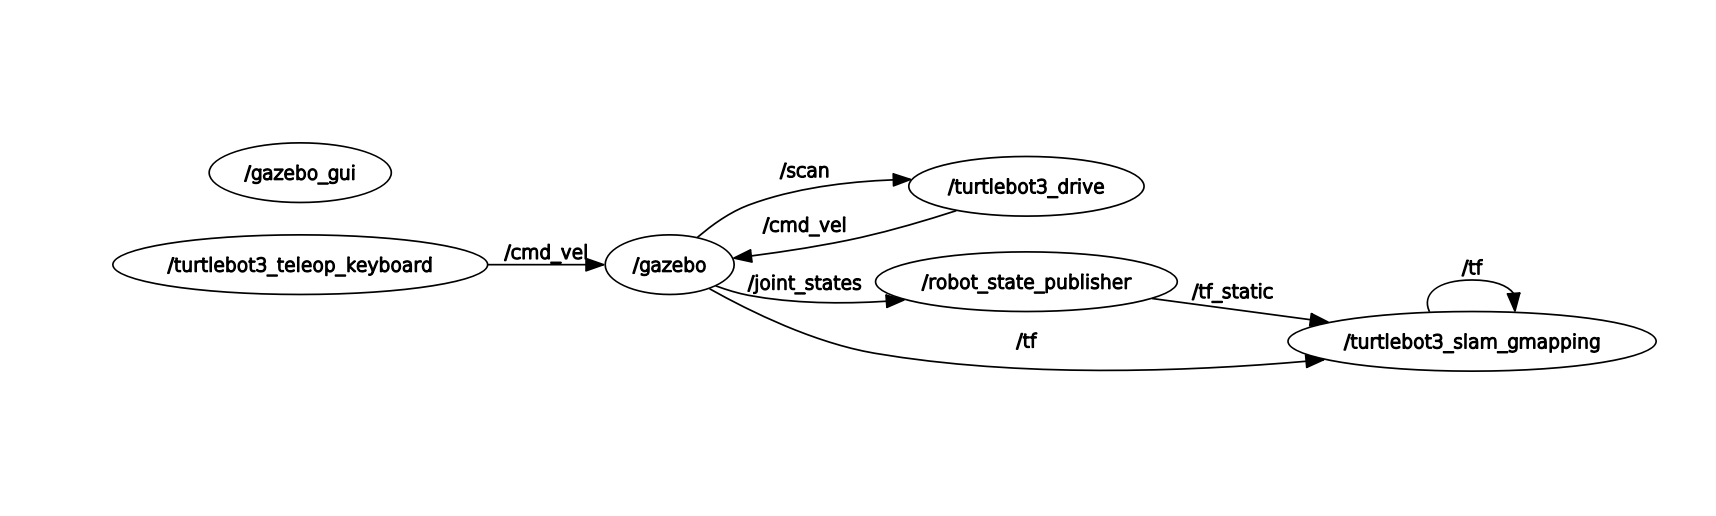

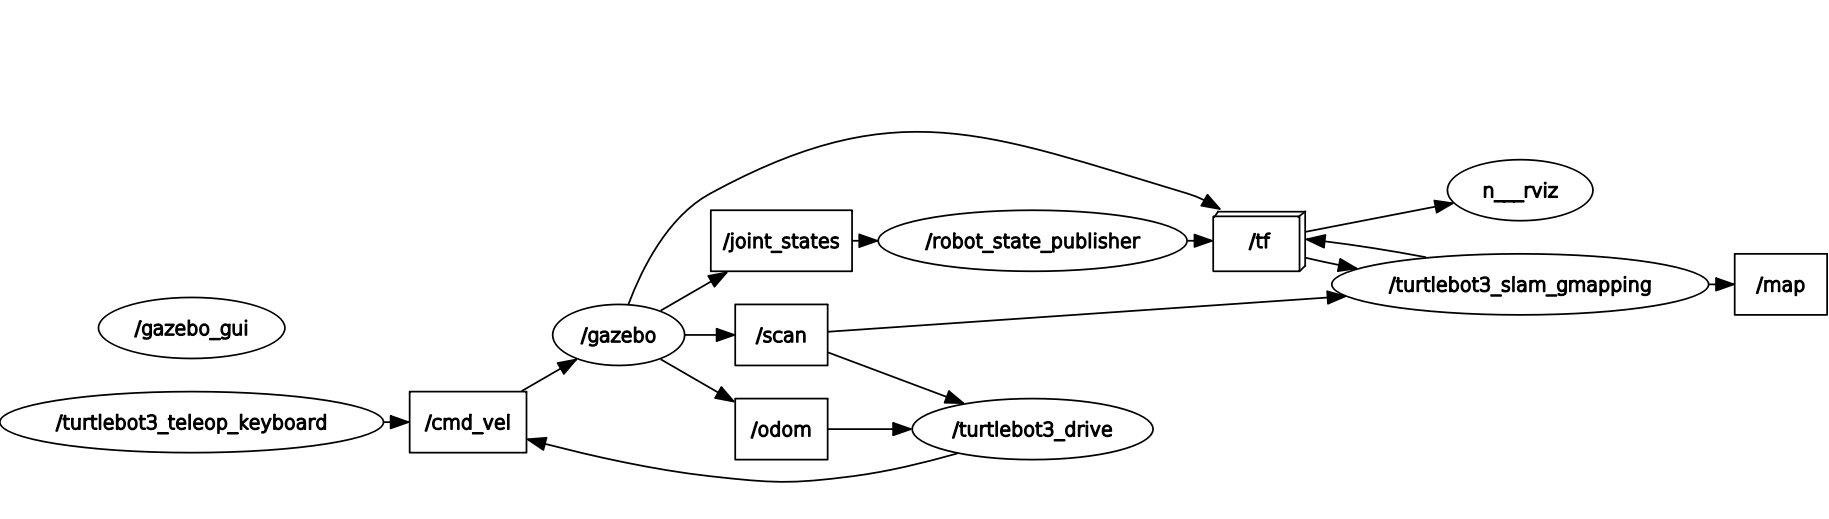

### Excersise 1
#### Make your own world at gazebo and create the map of your world.